In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
#Paso 2: Crear datos simulados
np.random.seed(123)
n_sample=200

volumen= np.random.uniform(100,5000,n_sample)
horas_maquinaria=np.random.uniform(10,100,n_sample)
distancia_puerto=np.random.uniform(5,50,n_sample)

costo=50*volumen+100*horas_maquinaria+20*distancia_puerto+np.random.uniform(0,50,n_sample)
data=pd.DataFrame({
    "volumen":volumen,
    "horas_maquina":horas_maquinaria,
    "distancia_puerto":distancia_puerto,
    "costo":costo
})

print(data)

         volumen  horas_maquina  distancia_puerto          costo
0    3512.699009      58.837233         25.532177  182064.385333
1    1502.082741      16.009700         17.591091   77092.307924
2    1211.572122      68.802838         46.980124   68446.489405
3    2801.442369      99.647769         19.145811  150463.646824
4    3625.397952      79.245760         45.937160  190136.619810
..           ...            ...               ...            ...
195  3215.911761      42.438135         25.081176  165546.035768
196   257.769881      28.958736         34.852674   16508.659358
197  3749.425210      47.908005         29.723588  192873.884035
198  2417.273711      29.623190          6.239432  123970.347931
199   696.596342      86.117726          6.436309   43585.841283

[200 rows x 4 columns]


In [8]:
#Analisis
print(data.describe())
print("\n Matriz de correlación")
print(data.corr())

           volumen  horas_maquina  distancia_puerto          costo
count   200.000000     200.000000        200.000000     200.000000
mean   2566.026997      54.131303         27.381613  134288.666442
std    1305.334271      26.581828         13.080713   65264.665931
min     113.171516      10.317899          5.003685   12130.500453
25%    1592.570636      31.353276         17.128061   87017.685383
50%    2651.780871      51.786441         26.956964  139961.503870
75%    3619.108529      78.260243         38.119990  186678.157244
max    4977.256562      99.647769         49.951328  258732.342765

 Matriz de correlación
                   volumen  horas_maquina  distancia_puerto     costo
volumen           1.000000      -0.021016         -0.005786  0.999145
horas_maquina    -0.021016       1.000000          0.101797  0.020153
distancia_puerto -0.005786       0.101797          1.000000  0.002387
costo             0.999145       0.020153          0.002387  1.000000


In [10]:
#Dividir los datos
X=data[["volumen","horas_maquina","distancia_puerto"]]
y=data["costo"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Los datos de prueba son: {X_test.shape[0]}")
print(f"Los datos de entrenamiento son: {X_train.shape[0]}")

Los datos de prueba son: 40
Los datos de entrenamiento son: 160


In [11]:
#Entrenamiento del modelo
modelo= LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [13]:
#Evaluación del modelo
y_pred=modelo.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [14]:
print("\nMetricas de evaluación")
print(f"R2 (Coeficiente de determinación: {r2:.2f})")
print(f"RMSE (Raiz del error cuadratico medio): {rmse:.2f}")



Metricas de evaluación
R2 (Coeficiente de determinación: 1.00)
RMSE (Raiz del error cuadratico medio): 14.40


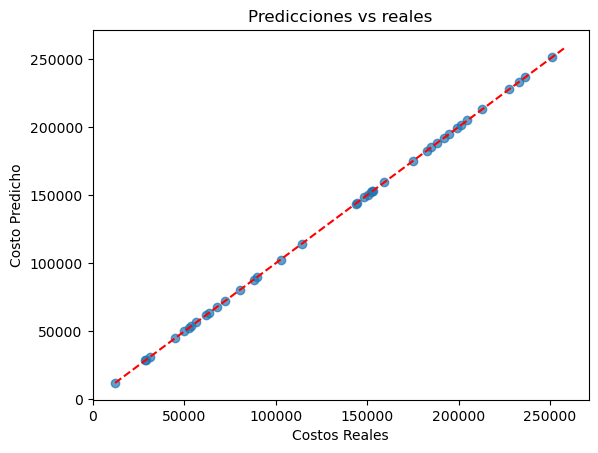

In [ ]:
#Grafico de dispersión
plt.title("Predicciones vs reales")
plt.xlabel("Costos Reales")
plt.ylabel("Costo Predicho")
plt.scatter(y_test,y_pred,alpha=0.7)
plt.plot([y.min(),y.max()],[y.min(),y.max()],"r--")
plt.show()

In [18]:
#Predicción
#Datos de un nuevo proyecto
nuevo_proyecto=pd.DataFrame({
    "volumen":[300],
    "horas_maquina":[40],
    "distancia_puerto":[25]
})

#Predecir
costo_predicho=modelo.predict(nuevo_proyecto)
print(f"El costo predicho para el nuevo proyecto es: ${costo_predicho[0]:.2f}")

El costo predicho para el nuevo proyecto es: $19527.23
